<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Time-Series-Data" data-toc-modified-id="Time-Series-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Time Series Data</a></span><ul class="toc-item"><li><span><a href="#What-is-Time-Series-Data?" data-toc-modified-id="What-is-Time-Series-Data?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong><font color="red">What is Time Series Data?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li></ul></li><li><span><a href="#Acquiring" data-toc-modified-id="Acquiring-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acquiring</a></span><ul class="toc-item"><li><span><a href="#What-is-a-REST-API?" data-toc-modified-id="What-is-a-REST-API?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong><font color="red">What is a REST API?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span></li><li><span><a href="#Acquire-a-DataFrame-by-Making-an-HTTP-Request" data-toc-modified-id="Acquire-a-DataFrame-by-Making-an-HTTP-Request-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span><strong>Acquire a DataFrame by Making an HTTP Request</strong></a></span></li><li><span><a href="#Acquire-a-Time-Series-DataFrame-using-DataReader" data-toc-modified-id="Acquire-a-Time-Series-DataFrame-using-DataReader-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span><strong>Acquire a Time Series DataFrame using DataReader</strong></a></span></li></ul></li><li><span><a href="#Preparing" data-toc-modified-id="Preparing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Preparing</a></span><ul class="toc-item"><li><span><a href="#What?" data-toc-modified-id="What?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong><font color="red">What?</font></strong></a></span></li><li><span><a href="#So-What?" data-toc-modified-id="So-What?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><strong><font color="orange">So What?</font></strong></a></span></li><li><span><a href="#Now-What?" data-toc-modified-id="Now-What?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong><font color="green">Now What?</font></strong></a></span><ul class="toc-item"><li><span><a href="#Use-.loc()" data-toc-modified-id="Use-.loc()-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Use .loc()</a></span></li><li><span><a href="#Date-Parts" data-toc-modified-id="Date-Parts-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Date Parts</a></span></li><li><span><a href="#Use-.assign()" data-toc-modified-id="Use-.assign()-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Use <code>.assign()</code></a></span></li><li><span><a href="#Use-.diff()" data-toc-modified-id="Use-.diff()-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Use <code>.diff()</code></a></span></li><li><span><a href="#Use-.resample()" data-toc-modified-id="Use-.resample()-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Use <code>.resample()</code></a></span></li><li><span><a href="#Using-.shift()" data-toc-modified-id="Using-.shift()-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Using <code>.shift()</code></a></span></li><li><span><a href="#Using-df.rolling()" data-toc-modified-id="Using-df.rolling()-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span>Using <code>df.rolling()</code></a></span></li></ul></li></ul></li></ul></div>

In [28]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

from pandas_datareader import data as web
from vega_datasets import data

import warnings
warnings.filterwarnings("ignore")

from acquire_walkthrough import get_store_data, german_energy_csv
from prepare_walkthrough import numeric_hists

## Time Series Data

### **<font color=red>What is Time Series Data?</font>**

In Time Series Data, time is your primary axis. With Time Series, your data has a natural temporal ordering and measures how things change over equally-spaced increments of time (the increments are not always equally-spaced increments. [See Heteroskedasticity](http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html)).

### **<font color=orange>So What?</font>**

We have more and more apps in our lives that use Time Series Data to handle data that measures change over time. From your smart thermostat to autonomous trading algorithms, time series databases are the 'fastest growing category of databases' ([source](https://blog.timescale.com/blog/what-the-heck-is-time-series-data-and-why-do-i-need-a-time-series-database-dcf3b1b18563/)).

### **<font color=green>Now What?</font>**

<a id=’conversion’></a>

Let's start by converting our DataFrame to a DatetimeIndex.

>Importing data from a csv file as DatetimeIndex

`pd.read_csv(df, parse_dates=True, index_col='date').sort_index()`

>Converting data to a DatetimeIndex

`df['date'] = pd.to_datetime(df.date)`

`df = df.set_index('date').sort_index()`

If you have pandas 1.0.3, read [the doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex) on DatetimeIndex.

## Acquiring

**<font color=green>Here we'll look at a couple example methods for acquiring some data we can use to practice working with time series.</font>**

### **<font color=red>What is a REST API?</font>**

Here is more than you need to know to start playing with the Requests library, but it still barely scratches the surface!

**API** stands for Application Programming Interface, and it is a set of rules that allows programs to talk to each other.

**JSON** stands for JavaScript Object Notation and is a text format that is language independent and made up of name/value pairs. (Like a Python dictionary object)

**REST** stands for **RE**presentational **S**tate **T**ransfer, which is an architectural style and approach to communications used in web service development. It can be thought of as the language of the internet.

### **<font color=orange>So What?</font>**

Basically, when you link to a **specific URL, a request**, you are able to get a piece of **data returned, a response**. 

A **RESTful JSON API** uses HTTP requests to **GET (retrieve a response object)**, **PUT (change the state of or update your response object)**, **POST (create the response object)**, and **DELETE (remove a response object)** data. It allows users to connect to, manage, and interact with cloud services.

The `requests` module allows you to send HTTP requests to a REST API using python. The HTTP request to a RESTful JSON API returns a response object with the data in JSON format. You can get a variety of information from this response object using different methods, some of which are explained in the table below in 'Now What.'


**<font color=purple>Parts of a Request:</font>**

**The Endpoint or Route**

**root-endpoint** is the starting point of the API you are requesting from.

>`https://api.github.com`

**path** directs your request and determines the resource you receive as a response to your GET request. The example below gets a list of repositories by a certain user, in this case `faithkane3`. The API documentation lets you know what paths are available to you.

>`https://api.github.com/users/faithkane3/repos`

**query parameters** allow you to modify your request with key-value pairs. They begin with a ? and are separated with &.

>`https://api.github.com/users/faithkane3/repos?sort=pushed`

![image.jpg](https://res.cloudinary.com/indysigner/image/fetch/f_auto,q_auto/w_2000/https://cloud.netlifyusercontent.com/assets/344dbf88-fdf9-42bb-adb4-46f01eedd629/c119c0b2-4ded-42d0-90f0-496b14bf5e1f/understanding-api-doc-github-repo-opt.png)
[source](https://www.smashingmagazine.com/2018/01/understanding-using-rest-api/)

**The Method or Type of Request** CRUD (Create, Read, Update, Delete)

**GET** - A GET request performs a READ operation. A GET request to a server sends you back the data you requested.

**POST** - A POST request performs a CREATE operation. 

**PUT** - A PUT request performs an UPDATE operation.

**PATCH** - A PATCH request performs an UPDATE operation.

**DELETE** - A DELETE request performs a DELETE operation


### **<font color=green>Now What?</font>**

**Properties and Methods of response objects (not an exhaustive list)**

| Property/Method | Description |
| :--- | ----------- |
| .content | Returns the response in bytes |
| .json() | Returns a JSON object of the result if result in JSON format, otherwise raises an error |
|.ok|Returns True if status_code is less than 200, otherwise False|
|.request|Returns the request object that requested this response|
|.status_code|Returns a number that indicates the status|
|.text|Returns the content of the response, in unicode|
|.url|Returns the URL of the response|

### **Acquire a DataFrame by Making an HTTP Request**

**<font color=purple>What if I wanted to get a list of repositories from a Github user?</font>**

In [4]:
import requests

url = 'https://api.github.com/users/faithkane3/repos?sort=pushed'
response = requests.get(url)
response

<Response [200]>

**`.ok` returns a boolean communicating if the request was successful.**

In [5]:
response.ok

True

**`.status_code` returns the HTTP response status code.**

In [6]:
response.status_code

200

**<font color=purple>HTTP Status Codes and Error Messages</font>**

>200+ means the request has succeeded.

>300+ means the request is redirected to another URL

>400+ means an error that originates from the client has occurred

>500+ means an error that originates from the server has occurred

**`.text` returns the raw response text**

In [7]:
# I'm limiting the text string to 500 characters bc it's one long string!

print(type(response.text))
response.text[:500]

<class 'str'>


'[{"id":213936295,"node_id":"MDEwOlJlcG9zaXRvcnkyMTM5MzYyOTU=","name":"ds-methodologies-exercises","full_name":"faithkane3/ds-methodologies-exercises","private":false,"owner":{"login":"faithkane3","id":43799876,"node_id":"MDQ6VXNlcjQzNzk5ODc2","avatar_url":"https://avatars0.githubusercontent.com/u/43799876?v=4","gravatar_id":"","url":"https://api.github.com/users/faithkane3","html_url":"https://github.com/faithkane3","followers_url":"https://api.github.com/users/faithkane3/followers","following_u'

In [8]:
# Use the `.json()` method on our response and access a list of dictionaries for all my Github repos
# The response will not always be a list of dictionaries; it might be a dictionary.
# In this case, there are 23 dictionaries in my list, 'data'

data = response.json()
print(type(data))
len(data)

<class 'list'>


23

In [9]:
# Access the keys of the first dictionary to understand the format of each dictionary in my list

data[0].keys()

dict_keys(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url', 'description', 'fork', 'url', 'forks_url', 'keys_url', 'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url', 'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url', 'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url', 'languages_url', 'stargazers_url', 'contributors_url', 'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url', 'comments_url', 'issue_comment_url', 'contents_url', 'compare_url', 'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url', 'milestones_url', 'notifications_url', 'labels_url', 'releases_url', 'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url', 'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size', 'stargazers_count', 'watchers_count', 'language', 'has_issues', 'has_projects', 'has_downloads', 'has_wiki', 'has_pages', 'forks_count', 'mirror_url', 'archived', 'disabled', 'open_issues_count', 'lic

In [10]:
# get a list of the names of all of my repos on Github

repos = []
for i in range(len(data)):
    repos.append(data[i]['name'])
print(repos)

['ds-methodologies-exercises', 'faithkane3.github.io', 'zillow_project', 'codeup_review', 'makeovermonday', 'python-exercises', 'pandas_practice', 'side_projects', 'flask_intro', 'intro-to-deep-learning-with-keras', 'natural_language_processing', 'python_fun', 'git_warmup', 'bayes-methodologies-exercises', 'statistics-exercises', 'resources', 'numpy-100', 'karma_atm', 'checkbook_application', 'database-exercises', 'sql_practice', '101-exercises', 'python_101_ds']


**OR I could just make it a pandas DataFrame!**

In [11]:
repos_df = pd.DataFrame(data)
repos_df.head(2)

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,forks_count,mirror_url,archived,disabled,open_issues_count,license,forks,open_issues,watchers,default_branch
0,213936295,MDEwOlJlcG9zaXRvcnkyMTM5MzYyOTU=,ds-methodologies-exercises,faithkane3/ds-methodologies-exercises,False,"{'login': 'faithkane3', 'id': 43799876, 'node_...",https://github.com/faithkane3/ds-methodologies...,None,False,https://api.github.com/repos/faithkane3/ds-met...,...,0,None,False,False,0,None,0,0,0,master
1,250357165,MDEwOlJlcG9zaXRvcnkyNTAzNTcxNjU=,faithkane3.github.io,faithkane3/faithkane3.github.io,False,"{'login': 'faithkane3', 'id': 43799876, 'node_...",https://github.com/faithkane3/faithkane3.githu...,None,False,https://api.github.com/repos/faithkane3/faithk...,...,0,None,False,False,0,None,0,0,1,master


In [12]:
repos_df.name.tolist()

['ds-methodologies-exercises',
 'faithkane3.github.io',
 'zillow_project',
 'codeup_review',
 'makeovermonday',
 'python-exercises',
 'pandas_practice',
 'side_projects',
 'flask_intro',
 'intro-to-deep-learning-with-keras',
 'natural_language_processing',
 'python_fun',
 'git_warmup',
 'bayes-methodologies-exercises',
 'statistics-exercises',
 'resources',
 'numpy-100',
 'karma_atm',
 'checkbook_application',
 'database-exercises',
 'sql_practice',
 '101-exercises',
 'python_101_ds']

**How about a list of urls for my repos? Handy for scraping repos!**

In [13]:
repos_df.html_url.tolist()

['https://github.com/faithkane3/ds-methodologies-exercises',
 'https://github.com/faithkane3/faithkane3.github.io',
 'https://github.com/faithkane3/zillow_project',
 'https://github.com/faithkane3/codeup_review',
 'https://github.com/faithkane3/makeovermonday',
 'https://github.com/faithkane3/python-exercises',
 'https://github.com/faithkane3/pandas_practice',
 'https://github.com/faithkane3/side_projects',
 'https://github.com/faithkane3/flask_intro',
 'https://github.com/faithkane3/intro-to-deep-learning-with-keras',
 'https://github.com/faithkane3/natural_language_processing',
 'https://github.com/faithkane3/python_fun',
 'https://github.com/faithkane3/git_warmup',
 'https://github.com/faithkane3/bayes-methodologies-exercises',
 'https://github.com/faithkane3/statistics-exercises',
 'https://github.com/faithkane3/resources',
 'https://github.com/faithkane3/numpy-100',
 'https://github.com/faithkane3/karma_atm',
 'https://github.com/faithkane3/checkbook_application',
 'https://github

### **Acquire a Time Series DataFrame using DataReader**

**pandas_datareader is an API that allows you to access stock price and volume. This can be some cool time series data to play around with.**

```python
web.DataReader({name} , {data_source} , {start} , {end})
```

In [45]:
df = web.DataReader(name='MSFT', data_source='yahoo', start = '2015-01-01', end='2020-12-31')

In [36]:
df = df.sort_index()

In [37]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.871037
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.390320
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.607944


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1351 entries, 2015-01-02 to 2020-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1351 non-null   float64
 1   Low        1351 non-null   float64
 2   Open       1351 non-null   float64
 3   Close      1351 non-null   float64
 4   Volume     1351 non-null   float64
 5   Adj Close  1351 non-null   float64
dtypes: float64(6)
memory usage: 73.9 KB


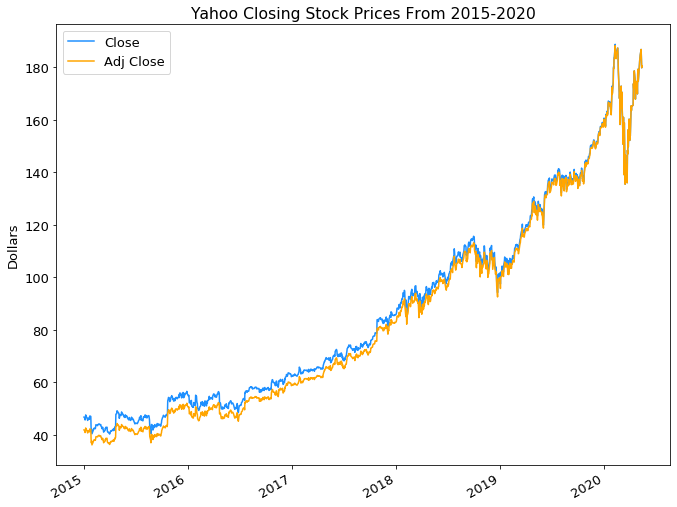

In [39]:
df.Close.plot(color='dodgerblue')
df['Adj Close'].plot(color='orange')

plt.title('Yahoo Closing Stock Prices From 2015-2020')
plt.xlabel('')
plt.ylabel('Dollars')
plt.legend()
plt.show()

In [40]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1351.000000,1351.000000,1351.000000,1351.000000,1.351000e+03,1351.000000
mean,87.776070,86.130200,86.983153,87.003205,3.036452e+07,84.226126
std,38.455846,37.502869,38.023801,38.009968,1.525503e+07,39.252601
min,40.740002,39.720001,40.340000,40.290001,7.425600e+06,36.170650
25%,54.680000,53.709999,54.195000,54.195000,2.107150e+07,49.948719
50%,74.379997,73.500000,73.940002,74.010002,2.646020e+07,71.003471
75%,111.525002,109.450001,110.849998,110.869999,3.453345e+07,108.899429
max,190.699997,186.470001,190.649994,188.699997,1.691640e+08,188.185989


**When you have time, this tutorial plays with DataReader [more](https://www.youtube.com/watch?v=UFuo7EHI8zc&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS&index=10).**

## Preparing


### **<font color=red>What?</font>**

I will address specifically preparing data with a DatetimeIndex. Click [here](#conversion) to jump back up to how to convert your DataFrame or import your csv file to have a DatetimeIndex.

### **<font color=orange>So What?</font>**



### **<font color=green>Now What?</font>**

**If you have upgraded to pandas 1.0.3, you can check by running this in a cell `pd.__version__`, [this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex) might be helpful.**

**<font color=purple>I will use my function to get some DatetimeIndex data to work with.</font>**

In [31]:
# let's use the flights dataset from vega_datasets

fdf = data.flights_20k()
fdf = fdf.set_index('date').sort_index()
fdf.head(2)

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI


In [61]:
fdf.index.min()

Timestamp('2001-01-01 00:01:00')

In [62]:
fdf.index.max()

Timestamp('2001-03-31 21:30:00')

#### Use .loc()

**You can use `.loc[]` to access a row or column or a group of rows or colums by date.**

**We can pass in our results from calling `fdf.index.min()` and `fdf.index.max()` above. We get back all of the information for the first observation in our dataset and the last.**

In [65]:
# There is only one observation that matches this date and time combo

fdf.loc[fdf.index.min()]

delay              14
distance          405
origin            MCI
destination       MDW
year             2001
month               1
weekday        Monday
Name: 2001-01-01 00:01:00, dtype: object

In [64]:
# There are two observations with this date and time combo, so we receive back a df.

fdf.loc[fdf.index.max()]

,delay,distance,origin,destination,year,month,weekday
date,,,,,,,
2001-03-31 21:30:00,30,174,TPA,PBI,2001,3,Saturday
2001-03-31 21:30:00,-11,495,BWI,SDF,2001,3,Saturday


In [77]:
# We can look at all of the observations from a specific date passed to .loc[]

fdf.loc['2001-02-03'].head()

,delay,distance,origin,destination,year,month,weekday
date,,,,,,,
2001-02-03 06:20:00,-2,303,HOU,MSY,2001,2,Saturday
2001-02-03 06:25:00,8,689,SLC,SEA,2001,2,Saturday
2001-02-03 06:30:00,-1,570,BHM,HOU,2001,2,Saturday
2001-02-03 06:30:00,-11,677,ABQ,LAX,2001,2,Saturday
2001-02-03 06:30:00,0,399,BOI,SEA,2001,2,Saturday


In [75]:
# We can look at all of the observations from a specific date range to .loc[]

fdf.loc['2001-02-03' : '2001-02-05'].head()

,delay,distance,origin,destination,year,month,weekday
date,,,,,,,
2001-02-03 06:20:00,-2,303,HOU,MSY,2001,2,Saturday
2001-02-03 06:25:00,8,689,SLC,SEA,2001,2,Saturday
2001-02-03 06:30:00,-1,570,BHM,HOU,2001,2,Saturday
2001-02-03 06:30:00,-11,677,ABQ,LAX,2001,2,Saturday
2001-02-03 06:30:00,0,399,BOI,SEA,2001,2,Saturday


In [76]:
# We can look at all of the observations from a month and year combo passed to .loc[]

fdf.loc['2001-01'].head()

,delay,distance,origin,destination,year,month,weekday
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,2001,1,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,2001,1,Monday
2001-01-01 06:30:00,-8,251,MDW,STL,2001,1,Monday
2001-01-01 07:00:00,-10,361,OAK,ONT,2001,1,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,2001,1,Monday


#### Date Parts

**A DatetimeIndex allows me to quickly access and isolate other information about a particular datetime like the month, the day of the week, or the year. There are many more attributes of a timestamp object that you can access [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas.DatetimeIndex).**

In [33]:
# Create new columns in my flights df by accessing different attributes of our DatetimeIndex

fdf['year'] = fdf.index.year.astype('category')
fdf['month'] = fdf.index.month.astype('category')
fdf['weekday'] = fdf.index.day_name().astype('category')

fdf.head(2)

,delay,distance,origin,destination,year,month,weekday
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,2001,1,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,2001,1,Monday


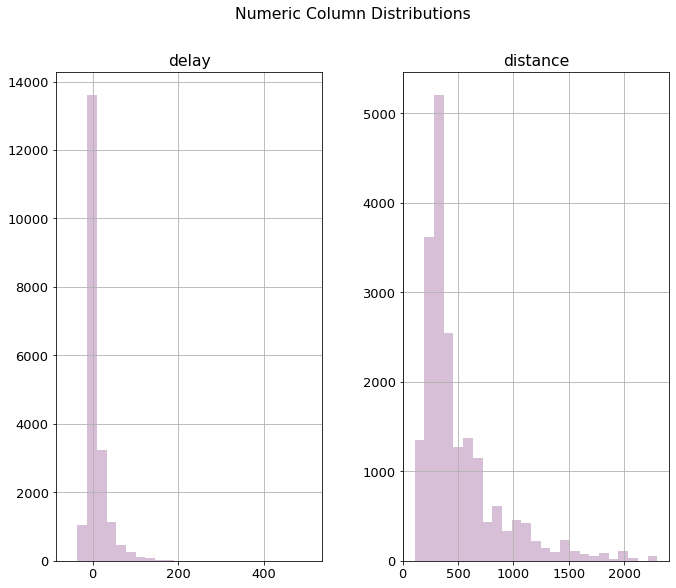

In [34]:
numeric_hists(fdf, bins=25)

####  Use `.assign()` 
**Create New Columns from existing columns in your df**

```python
df = df.assign(new_col_name = your calculation)
```

In [95]:
# Let's use our Microsoft df again.
df = web.DataReader(name='MSFT', data_source='yahoo', start = '2015-01-01', end='2020-12-31').sort_index()
df.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866


In [96]:
# Create a new calculated column from two existing columns in my DataFrame

df = df.assign(Price_range = df.High - df.Low)
df.head(1)

,High,Low,Open,Close,Volume,Adj Close,Price_range
Date,,,,,,,
2015-01-02,47.419998,46.540001,46.66,46.759998,27913900.0,41.864841,0.879997


#### Use `.diff()`

**Using `.diff()` calculates the difference of a df element compared with another element in the df (the default is the element in the same column of the previous row).**

    {default}
```python
df.diff(periods=1, axis=0)
```

**Difference in df element with df element in previous rows**
```python
df.diff()
```

**Difference in df element with df element in previous columns**
```python
df.diff(axis=1)
```

In [97]:
# Create a new calculated column with the value of the difference between current sales and previous day sales

df = df.assign(Price_range_diff = df.Price_range.diff())
df.head(5)

,High,Low,Open,Close,Volume,Adj Close,Price_range,Price_range_diff
Date,,,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841,0.879997,NaN
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866,0.480000,-0.399998
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.871037,1.209999,0.730000
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.390320,0.969997,-0.240002
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.607944,1.029999,0.060001


#### Use `.resample()`

**Using `df.resample()` is similar to a `df.groupby()` operation, but with `df.resample()` you end up aggregating with a time frequency.**

- **rule:** {DateOffset, Timedelta or str}
   
- **axis:** {0 or ‘index’, 1 or ‘columns’}, default 0

```python
df.resample(rule='D', axis=0)
```

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [98]:
# Here I resample my df by month and sum the differences in price range from one day to the next
    
df.resample('M').Price_range_diff.sum().head()

Date
2015-01-31    0.350006
2015-02-28   -0.690002
2015-03-31   -0.050003
2015-04-30    0.450005
2015-05-31    0.039997
Freq: M, Name: Price_range_diff, dtype: float64

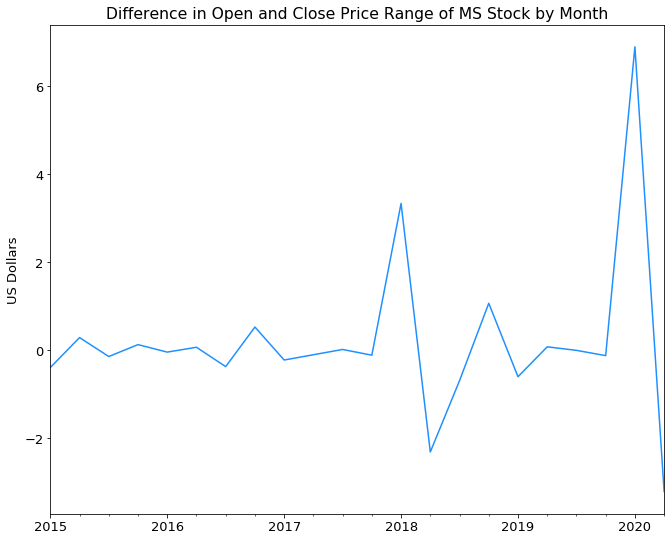

In [99]:
# How about a quick look at that resample...
# It looks like the total monthly rise and fall of MS stock prices.

df['Price_range_diff'].resample('Q').sum().plot(color='dodgerblue')

plt.title('Difference in Open and Close Price Range of MS Stock by Month')
plt.xlabel('')
plt.ylabel('US Dollars')
plt.show()

**<font color=purple>You can also use `.resample()` with your own custom function using `.apply()`.</font>**

```python
df.resample(rule='A').apply(my_func)
```

#### Using `.shift()`

**Using `df.shift()` shifts all of the data points for the columns forwards or backwards by 1 observation by default.**

```python
df.shift(periods=1)
```

In [100]:
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close,Price_range,Price_range_diff
Date,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841,0.879997,NaN
2015-01-06,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866,0.480000,-0.399998
2015-01-07,46.750000,45.540001,46.380001,45.650002,36447900.0,40.871037,1.209999,0.730000
2015-01-08,46.459999,45.490002,45.980000,46.230000,29114100.0,41.390320,0.969997,-0.240002


```python
df.shift(periods=-1)
```

In [101]:
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close,Price_range,Price_range_diff
Date,,,,,,,,
2015-01-02,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866,0.480000,-0.399998
2015-01-05,46.750000,45.540001,46.380001,45.650002,36447900.0,40.871037,1.209999,0.730000
2015-01-06,46.459999,45.490002,45.980000,46.230000,29114100.0,41.390320,0.969997,-0.240002
2015-01-07,47.750000,46.720001,46.750000,47.590000,29645200.0,42.607944,1.029999,0.060001
2015-01-08,47.820000,46.900002,47.610001,47.189999,23944200.0,42.249817,0.919998,-0.110001


```python
df.shift(periods=1, freq=None, axis=0, fill_value=None)
```

In [102]:
df.shift(periods=1, freq='W').head(10)

,High,Low,Open,Close,Volume,Adj Close,Price_range,Price_range_diff
Date,,,,,,,,
2015-01-04,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841,0.879997,NaN
2015-01-11,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866,0.480000,-0.399998
2015-01-11,46.750000,45.540001,46.380001,45.650002,36447900.0,40.871037,1.209999,0.730000
2015-01-11,46.459999,45.490002,45.980000,46.230000,29114100.0,41.390320,0.969997,-0.240002
2015-01-11,47.750000,46.720001,46.750000,47.590000,29645200.0,42.607944,1.029999,0.060001
2015-01-11,47.820000,46.900002,47.610001,47.189999,23944200.0,42.249817,0.919998,-0.110001
2015-01-18,47.540001,46.360001,47.419998,46.599998,23651900.0,41.721588,1.180000,0.260002
2015-01-18,47.910000,46.060001,46.970001,46.360001,35270600.0,41.506714,1.849998,0.669998
2015-01-18,46.240002,45.619999,45.959999,45.959999,29719600.0,41.148579,0.620003,-1.229996


#### Using `df.rolling()`

Creates a window of time and performs some type of aggregate function on it.

```python
df.rolling(
    window,
    min_periods=None,
    center=False,
    win_type=None,
    on=None,
    axis=0,
    closed=None,
)```

In [103]:
# Create a 7 day rolling average on our df

df.rolling(7).mean().head(10)

,High,Low,Open,Close,Volume,Adj Close,Price_range,Price_range_diff
Date,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,47.210000,46.257144,46.738571,46.621428,3.005587e+07,41.740773,0.952856,NaN
2015-01-13,47.280000,46.188572,46.782857,46.564286,3.110683e+07,41.689612,1.091427,0.138572
2015-01-14,47.210000,46.098572,46.724286,46.511428,2.968479e+07,41.642285,1.111428,0.020000


In [104]:
df = df.assign(Rolling_mean_7 = df.Price_range.rolling(7).mean().head(10))
df.head(10)

,High,Low,Open,Close,Volume,Adj Close,Price_range,Price_range_diff,Rolling_mean_7
Date,,,,,,,,,
2015-01-02,47.419998,46.540001,46.660000,46.759998,27913900.0,41.864841,0.879997,NaN,NaN
2015-01-05,46.730000,46.250000,46.369999,46.330002,39673900.0,41.479866,0.480000,-0.399998,NaN
2015-01-06,46.750000,45.540001,46.380001,45.650002,36447900.0,40.871037,1.209999,0.730000,NaN
2015-01-07,46.459999,45.490002,45.980000,46.230000,29114100.0,41.390320,0.969997,-0.240002,NaN
2015-01-08,47.750000,46.720001,46.750000,47.590000,29645200.0,42.607944,1.029999,0.060001,NaN
2015-01-09,47.820000,46.900002,47.610001,47.189999,23944200.0,42.249817,0.919998,-0.110001,NaN
2015-01-12,47.540001,46.360001,47.419998,46.599998,23651900.0,41.721588,1.180000,0.260002,0.952856
2015-01-13,47.910000,46.060001,46.970001,46.360001,35270600.0,41.506714,1.849998,0.669998,1.091427
2015-01-14,46.240002,45.619999,45.959999,45.959999,29719600.0,41.148579,0.620003,-1.229996,1.111428


## Exploring


### **<font color=red>What?</font>**



### **<font color=orange>So What?</font>**



### **<font color=green>Now What?</font>**